Number of rows: 57394
Number of columns: 49
iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million           

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


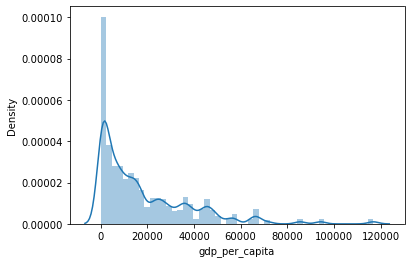

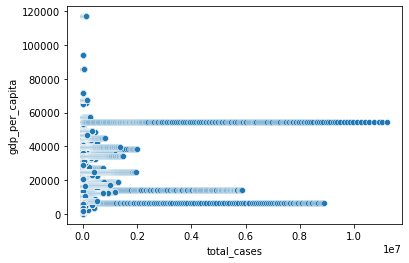

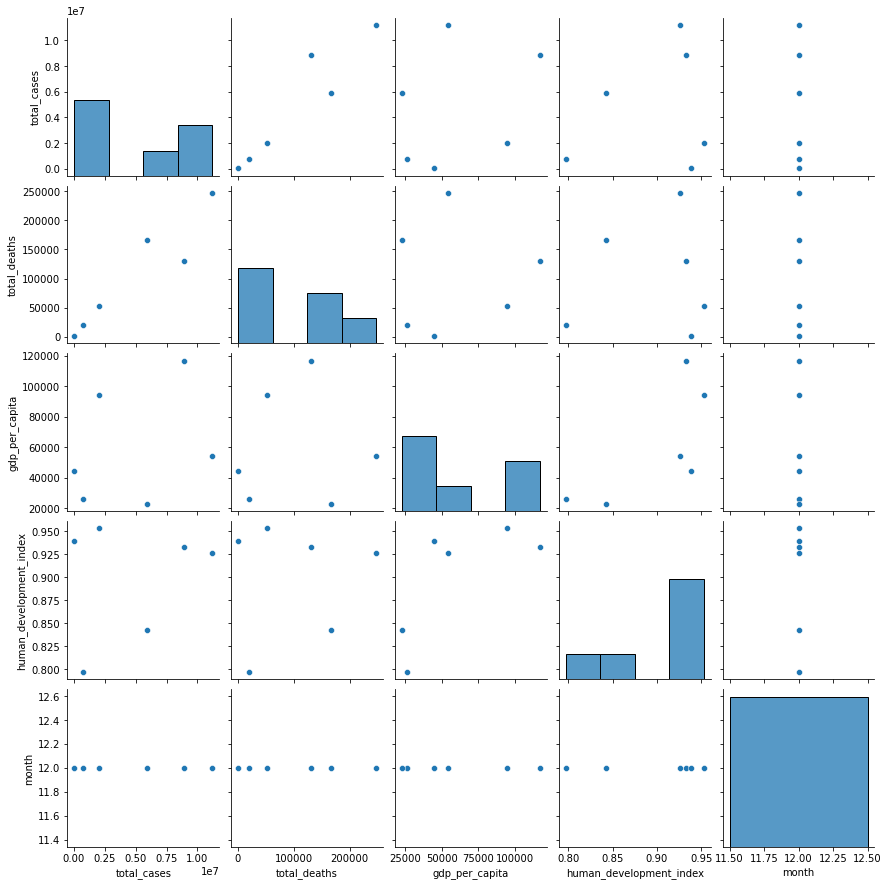

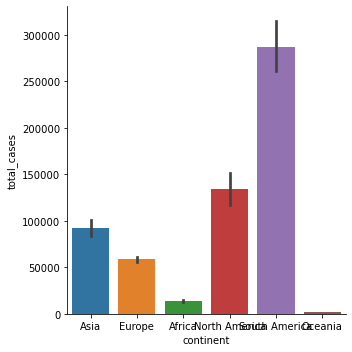

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

#High Level Data Understanding:
#a. Find no. of rows & columns in the dataset

num_rows = df.shape[0]
num_columns = df.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

#b. Data types of columns.

print(df.dtypes)

#c. Info & describe of data in dataframe.

print(df.info())
print(df.describe())

#Low Level Data Understanding:
##a. Find count of unique values in location column.

print(df['location'].nunique())

#b. Find which continent has maximum frequency using values counts.

continent_counts = df['continent'].value_counts()
max_continent = continent_counts.idxmax()
print(f"Continent with maximum frequency: {max_continent}")

#c. Find maximum & mean value in 'total_cases'.

max_cases = df['total_cases'].max()
mean_cases = df['total_cases'].mean()
print(f"Maximum value in total_cases: {max_cases}")
print(f"Mean value in total_cases: {mean_cases}")

#d. Find 25%,50% & 75% quartile value in 'total_deaths'.

quartiles = df['total_deaths'].quantile([0.25, 0.5, 0.75])
print(f"25% quartile value: {quartiles[0.25]}")
print(f"50% quartile value: {quartiles[0.5]}")
print(f"75% quartile value: {quartiles[0.75]}")

#e. Find which continent has maximum 'human_development_index'.

max_hdi_continent = df.loc[df['human_development_index'].idxmax(), 'continent']
print(f"Continent with maximum human development index: {max_hdi_continent}")

#f. Find which continent has minimum 'gdp_per_capita'.

min_gdp_continent = df.loc[df['gdp_per_capita'].idxmin(), 'continent']
print(f"Continent with minimum GDP per capita: {min_gdp_continent}")

#4. Filter the dataframe with only this columns ['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] and update the data frame.

df = df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]

#5. Data Cleaning
#a. Remove all duplicates observations

df.drop_duplicates(inplace=True)

#b. Find missing values in all columns
print(df.isnull().sum())

#c. Remove all observations where continent column value is missing
df.dropna(subset=['continent'], inplace=True)

# d. Fill all missing values with 0
df.fillna(0, inplace=True)

#6. Date time format :
#a. Convert date column in datetime format usingpandas.to_datetime
    
df['date'] = pd.to_datetime(df['date'])

#b. Create new column month after extracting month data from date column.

df['month'] = df['date'].dt.month

#7. Data Aggregation:
#a. Find max value in all columns using groupby function on 'continent' column
#Tip: use reset_index() after applying groupby
#b. Store the result in a new dataframe named 'df_groupby'.
#(Use df_groupby dataframe for all further analysis)

df_groupby = df.groupby('continent').max().reset_index()

#8. Feature Engineering :
#a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'

df['total_deaths_to_total_cases'] = df['total_deaths'] / df['total_cases']

#9. Data Visualization :
#a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.

sns.distplot(df['gdp_per_capita'])
plt.show()

# b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

sns.scatterplot(x='total_cases', y='gdp_per_capita', data=df)
plt.show()

# c. Plot Pairplot on df_groupby dataset.

sns.pairplot(df_groupby)
plt.show()

# d. Plot a bar plot of 'continent' column with 'total_cases' .

sns.catplot(x='continent', y='total_cases', kind='bar', data=df)
plt.show()

#10.Save the df_groupby dataframe in your local drive using pandas.to_csv function .
df_groupby.to_csv('df_groupby.csv', index=False)


